# Modulation von Messsignalen <a id="SubSec-Information"></a>

Im ersten Abschnitt haben wir schon angedeutet, dass nicht nur physikalische Größen in Messsignale umgewandelt werden, sondern auch Signale in andere Signalformen. Sehr häufiges Beispiel aus der Messtechnik ist der Informationsparameter Amplitude der in Frequenz umgewandelt wird. Dies hat den einfachen Grund, dass die Frequenz eines Messsignals extrem unempfindlich gegenüber Störeinflüssen aus der Umgebung ist. Eine Amplitude wird viel schneller verfälscht, oder abgeschwächt, als die Frequenz. Ein weiterer Vorteil ist, dass die Frequenz eines Messsignals sehr einfach digitalisiert werden kann, wodurch auch die physikalische Größe schnell digital zur Verfügung steht. Man könnte beispielsweise eine einfache Triggereinrichtung nutzen, welche die Frequenz eines Messsignals in Pulse umwandelt, die mit einer bestimmten Wiederholrate (also mit der Frequenz des Signals) zur Verfügung gestellt werden. Diese Pulse werden dann innerhalb eines definierten Zeitfenster ausgezählt. Mit solchen *Frequenzzählern* werden wir uns später noch ausführlicher beschäftigen. Für solch eine Art von Messsignal wird eine **Modulation** des Messsignals benötigt, welche die physikalische Größe (z.B. ein Audiosignal) auf den Träger (z.B. eine Radiowelle), aufbringt. 

## Träger- und Nutzsignale

Klassischerweise benutzt man eine sinusförmige Schwingung konstanter Frequenz und Amplitude als **Trägerschwingung**. Durch die Modulation können folgende Parameter der Trägerschwingung beeinflusst werden:
* die Amplitude. Dies ist bekannt als Amplitudenmodulation (AM)
* die Frequenz. Dies ist bekannt als Frequenzmodulation (FM)
* die Phase. Hierbei wird der Nullphasenwinkel verschoben. Dies ist bekannt als Phasenmodulation (PM)

Im Anschluss muss mittels **Demodulation** der originale Zeitverlauf der physikalischen Größe zurückgewonnen werden. 

**Nutzsignale** wie Sprache oder Musik können häufig nicht direkt über gewünschte Übertragungsmedien wie beispielsweise einen Funkkanal übertragen werden. Hierfür wird ein Trägersignal benötigt, mittels welchem das Nutzsignal übertragen werden kann.
Wir nehmen ein sinuförmiges Nutzsignal (*message*) an:

$$m(t) = A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t)$$

mit der Amplitude $A_\mathrm{m}$ and Frequenz $f_\mathrm{m} = 100\,\mathrm{Hz}$. Außerdem widmen wir uns zunächst einem *sinusförmigen* Trägersignal (*carrier*)

$$s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

mit der Amplitude $A_c$ und der Trägerfrequenz $f_c = 1\,\mathrm{kHz}$. $p_{0}$ ist eine Konstante, die Phase zum Zeitpunkt $t=0$.
Beide Signale sind den folgenden Diagrammen für $f_\mathrm{m} = 100\,\mathrm{Hz}$ und $f_c = 1\,\mathrm{kHz}$ dargestellt.

In [1]:
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import read #import the required function from the module
import matplotlib.pyplot as plt
import numpy as np
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

samplerate, data = read('CantinaBand3.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

Fs = 22050.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,0.02,Ts) # time vector
ff = 1000;   # frequency of the carrier
f_m = 100
maxN = int(Fs/2)
# Sinusschwingung
f = lambda freq, ampl, t:  ampl*np.sin(2*np.pi*freq*t)
y = f(ff,1.0,t)
y_nutz = f(f_m,1.0,t)

data_norm = data/np.max(data)
y_nutz_norm = y_nutz/np.max(y_nutz)
plt.subplot(1,2,1)
#plt.plot(time, data_norm, 'tab:blue')
plt.plot(t, y_nutz_norm, 'tab:blue')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.title('Nachricht')
#plt.xlim([0.0,0.3])
#plt.ylim([-0.4,0.4])

plt.subplot(1,2,2)
plt.plot(t, y, 'k')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.title('Trägersignal')
#plt.xlim([0.0,0.3])

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'CantinaBand3.wav'

<Figure size 800x300 with 0 Axes>

Es gibt nun verschiedene Methoden um die Nachricht auf das Trägersignal zu modulieren und so zu übertragen:

## Amplitudenmodulation

Zur Übertragung wird das Nutzsignal in einen anderen Frequenzbereich verschoben, was beispielsweise durch eine **Amplitudenmodulation (AM)** geschehen kann. Durch das Verschieben können auch mehrere Nutzsignale gleichzeitig und ohne gegenseitige Störung übertragen werden.

$$y_\mathrm{AM}(t) = \left[A_c + M_a \cdot m(t)\right] \cdot \sin(2\pi  f_c  t)$$

$M_a$ ist die Modulationsstärke und $m(t)$ die modulierende Funktion oder kurz der Modulator. Hier wäre es entsprechend die Nachricht, die auf das Trägersignal moduliert wird. 

Setzt man ein sinusförmiges Nutzsignal ein, so erhält man:

$$
\begin{align} 
y_\mathrm{AM}(t) & = \left[A_c + M_a \cdot A_\mathrm{m} \cdot \sin(2\pi f_\mathrm{m} t)\right] \cdot \sin(2\pi  f_c  t) \\
& = A_c \sin(2\pi  f_c  t)  + \frac{M_a A_m}{2} \left[ \cos\{2\pi(f_m-f_c)t \} - \cos\{2\pi(f_m+f_c)t \} \right]
\end{align} 
$$

:::{admonition} Aufgabe
:class: tip
Beweise die obige Umformung mithilfe der trigonometrischen Umrechnungsformel 

$$\sin \alpha \sin \beta ={\frac {1}{2}}{\bigl (}\cos(\alpha -\beta )-\cos(\alpha +\beta ){\bigr )} !
$$

:::

Aus Formel kann man das entstandene Frequenzspektrum ablesen (siehe [Fourier-Analyse](3_FourierAnalyse.ipynb)). Vorne in der Formel steht das Trägersignal mit der Frequenz $f_c$ und hinten stehen zwei Terme, die sogenannten Seitenbänder, mit den Frequenzen $f_m-f_c$ und $f_m + f_c$. Diese einfachste Modulationsart der AM nennt man deshalb auch **Zweiseitenbandmodulation (ZSB oder englisch DSB)** mit Träger. Hier steckt die Information in den Seitenbändern, während der Träger selbst bei der Übertragung nur unnötigen Ballast darstellt. Wenn sich die Amplitude des Nutzsignals ändert, ändert sich auch die Amplitude der Seitenfrequenzen. Wenn sich die Frequenz des modulierenden Signals ändert, ändern sich auch die Frequenzen der Seitenbänder. 

Eine Amplitudenmodulation für einen Modulationsgrad von 0,5 sieht wiefolgt für die beiden oben definierten Nutz- und Trägersignale aus:

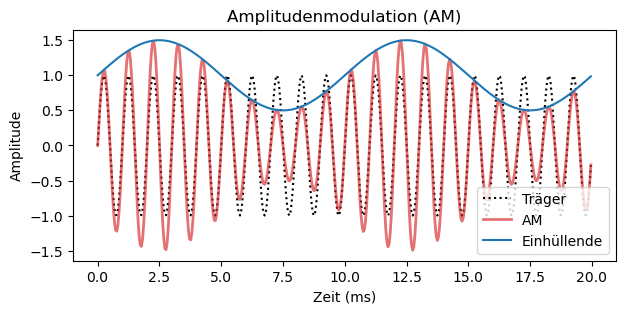

In [2]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(7,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
A = 1.0
M_a = 0.5
AM = (A+M_a*y_nutz_norm)*f(ff,1.0,t)

plt.plot(t*1000, y, 'k', ls=':', label = 'Träger')
plt.plot(t*1000,AM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t*1000, (A+M_a*y_nutz_norm), 'tab:blue', label = 'Einhüllende')
plt.title('Amplitudenmodulation (AM)')
#plt.xlim([0.276,0.285])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Alternativ zur Berechnung des modulierten Signals im Zeitbereich kann dies auch über die Fourier-Transformation im Frequenzbereich geschehen. Die dazu inverse Fourier-Transformation führt wieder in den Zeitbereich (siehe [Fourier-Analyse](3_FourierAnalyse.ipynb)).

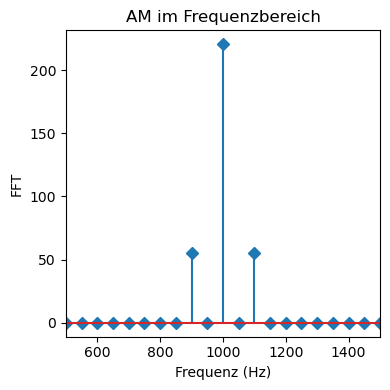

In [3]:
from scipy.fft import rfft, rfftfreq
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(4,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
# Note the extra 'r' at the front
AMyf = rfft(AM)
AMxf = rfftfreq(len(AM), 1 / Fs)
markerline, stemlines, baseline = plt.stem(AMxf,np.abs(AMyf), markerfmt = 'D') # plotting the spectrum

plt.xlabel('Frequenz (Hz)')
plt.ylabel('FFT')
plt.title('AM im Frequenzbereich')
plt.xlim([500,1500])
plt.tight_layout()

plt.show()

### Demodulation

Es gibt prinzipiell zwei Möglichkeiten die Modulation rückgängig zu machen um das ursprüngliche Nutzsignal zu rekonstruieren:

Bei schwachen oder stark gestörten Signalen wird auf der Empfängerseite ein lokaler Träger benutzt, der in Phase zu Träger des empfangenen Signals ist. Beide Träger sind synchron und damit kohärent zu einander. Dieses Verfahren ist technisch gesehen aufwendiger als die zweite Option.
Zunächst wird das empfangene Signal, $y_\mathrm{AM}(t)$, bestehend aus den beiden Seitenfrequenzen und dem Träger, mit dem lokalen Träger multipliziert und anschließend werden die hohen Frequenzanteile $2f_c$ mit einem Tiefpass und der Gleichanteil mit einem Hochpass heraus gefiltert. Das gesuchte Nutzsignal bleibt übrig, jedoch nur mit halber Amplitude:

$$
\begin{align} 
y_\mathrm{AM,demod}(t) &= y_\mathrm{AM}(t) \cdot s(t) \\
& = \left[ A_c \sin(2\pi  f_c  t)  + \frac{M_a A_m}{2} \left[ \cos\{2\pi(f_m-f_c)t \} - \cos\{2\pi(f_m+f_c)t \} \right] \right]  \cdot A_c \sin(2\pi f_c t + p_0) \\
&= \frac{A_m}{2} \sin(2 \pi f_m t)
\end{align}
$$
    
:::{admonition} Aufgabe
:class: tip
Beweise die obige Umformung unter Vernachlässigung der hohen Frequenzanteile $2f_c$ und des Gleichanteils.
:::

Diese einfachste Form der Demodulation kommt ohne die aufwendige Erzeugung eines lokalen Trägers aus und ermöglichte deshalb vor hundert Jahren die Verbreitung von Rundfunksendern. Das Verfahren ist allerdings nur bei ausreichend starken Signalen anwendbar und erfordert im Regelfall einen vorhergehenden Verstärker. Hier wird das gesuchte Frequenzband mit einem Bandpass herausgefiltert, anschließend mit einer Diode gleichgerichtet und zum Schluss mit einem Tiefpass geglättet. Der enthaltene Gleichanteil wird gegebenenfalls mit einem Hochpass entfernt.

Auf Grund der Einfachheit dieses Verfahrens kann das empfangene Signal leicht durch Verzerrungen gestört werden. 

## Phasenmodulation 

Frequenzmodulation und Phasenmodulation hängen mathematisch eng zusammen. Eine Phasenmodulation eines sinusförmigen Trägers kann man sehr einfach ausdrücken. Zunächst der unmodulierte Träger:

$$ s(t) = A_c \cdot \sin(2\pi f_c t + p_0)$$

Wir können die momentane Phase als Funktion der Zeit schreiben: 

$$ p(t)=(\omega_{c}t+p_{0}) $$

mit der Kreisfrequenz $\omega_c = 2 \pi f_c$.

Nun wird die momentane Phase durch Addition eines Modulators verändert, dadurch entsteht der Ausdruck für eine Phasenmodulation:

$$ y_\mathrm{PM}(t)= A_c \sin\left(2\pi f_c t  +p_0 + M_p m(t)\right)$$

Dabei ist $M_{p}$ die Modulationsstärke und $m(t)$ die modulierende Funktion oder kurz der Modulator, hier die entsprechende Nachricht. Entsprechend:

$$ p(t)=2\pi f_c t+p_{0}+M_{p}m(t)$$

Man sieht, dass eine Phasenmodulation mathematisch sehr einfach auszudrücken ist.

## Frequenzmodulation

Vom heutigen Stand der Technik betrachtet ist die AM allerdings überholt, weil die Qualitätsansprüche gestiegen sind und mit modernen Bauelementen die **Frequenzmodulation (FM)** erheblich einfacher, billiger und leistungssparender gebaut werden können. Außerdem haben die FM einen höheren Dynamikumfang des Informationssignals und ist weniger anfällig gegenüber Störungen. Eine Frequenzmodulation setzt voraus, dass sich die Frequenz ständig ändert. Dieses lässt sich nicht mehr durch einen Term der Form $\omega_c t = 2\pi f_c t$ ausdrücken, sondern wir müssen den Begriff der momentanen Kreisfrequenz einführen:

$$\omega(t) = \frac{d}{dt}p(t)$$

wobei $p(t)$ eine sich verändernde Phase ist. Die **momentane Frequenz** ist also ganz allgemein die zeitliche Ableitung der Phasenfunktion (vgl. in diesem Zusammenhang die Beziehung zwischen Geschwindigkeit und Ort und die Analogie zwischen Phase und Ort bzw. Frequenz und Geschwindigkeit). Eine Frequenzmodulation fordert nun, dass sich die momentane Frequenz verändert:

$$\omega (t)=\omega_c+M_{f} m(t)$$ 

wobei $M_f$ wieder die Modulationstärke ist und $m(t)$ die modulierende Funktion, bzw. *message*.

Für die Berechnung der Kurvenform zu jedem Zeitpunkt benötigen wir jedoch nicht die momentane Frequenz, sondern die Phasenfunktion. Wenn die Frequenz die Ableitung der Phase ist, so ist umgekehrt die Phase das Integral der Frequenz:

$$ p(t)=\int \omega (t)\,\mathrm {d} t $$

Setzen wir dies nun die Gleichung für momentane Frequenz ein, erhalten wir folglich:

$$ p(t)=\int \omega_c+M_{f} m(t)\,\mathrm {d} t = \omega_c t + p_0 + M_{f} \int  m(t)\,\mathrm {d} t$$

Damit erhält man für die Frequenzmodulation folgenden Ausdruck:

$$y_\mathrm{FM}(t) = A_c \cdot \sin\left(2\pi f_c t + p_0 + M_f\int m(t) dt \right)$$

Die Frequenzänderung ist durch die Amplitude des Nachrichtensignals gegeben. 

## Vergleich zwischen PM und FM

Wir setzen als Beispiel das oben eingeführte sinusförmige Nachrichtensignal, $m(t) = A_{m} \cdot \sin(2\pi f_\mathrm{m} t)$, mit $A_m=1$ und $A_c=1$ in die PM und FM Formeln ein:

$$ y_\mathrm{PM}(t) = \sin\left(2\pi f_c t  +p_0 + M_p \sin[2\pi f_m t]\right)$$

$$y_\mathrm{FM}(t) = \sin\left(2\pi f_c t + p_0 - \frac{M_f}{2\pi f_m}\cos[2\pi f_m t] \right)$$

Folgende Eigenschaften können beobachtet werden:
* Der Phasenhub für die Phasenmodulation ist immer noch $M_{p}$
* Der Phasenhub für die Frequenzmodulation ist ${\frac {M_{f}}{\omega_m}}$. 
* Die momentane Frequenz für die Phasenmodulation ist $\omega_c+M_{p}\omega_m\cos(\omega_m t+p_{m})$
* Die momentane Frequenz für die Frequenzmodulation ist $\omega_c+M_{f} \sin \left(\omega _{m}t+p_{m}\right)$

In beiden Fällen findet eine Modulation der Phase statt. Allerdings wirkt bei der Frequenzmodulation nicht der Modulator direkt auf die Phase ein, sondern es ist erst das Integral des Modulators zu rechnen. Das Integral hat eine Tiefpasswirkung. Der Phasenhub wird also bei der Frequenzmodulation mit zunehmender Frequenz des Modulators geringer. Umgekehrt wird der Frequenzhub bei der Phasenmodulation mit niedrig werdender Modulatorfrequenz immer geringer.

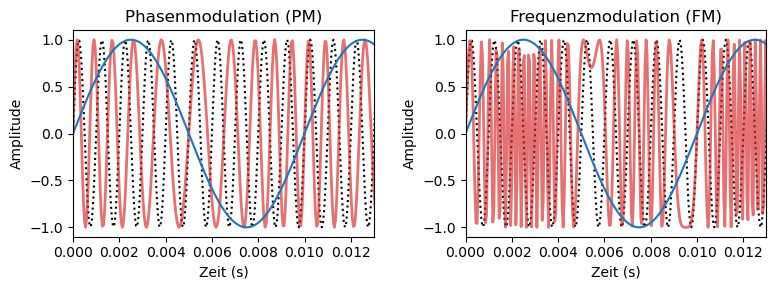

In [4]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße
A = 1.0
M_p = 4.0
PM = A * np.sin(2*np.pi*ff*t + M_p*y_nutz_norm)
plt.subplot(1,2,1)
plt.plot(t, y, 'k', ls=':', label = 'Träger')
plt.plot(t,PM, 'tab:red', lw=2, alpha = 0.65, label = 'AM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('Phasenmodulation (PM)')
plt.xlim([0.0,0.013])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')

# FM
M_f = 1.0
FM = A * np.sin(2*np.pi*ff*t + M_f*(np.cumsum(y_nutz_norm)))
plt.subplot(1,2,2)
plt.plot(t, y, 'k', ls=':', label = 'Träger')
plt.plot(t,FM, 'tab:red', lw=2, alpha = 0.65, label = 'FM')
plt.plot(t, y_nutz_norm, 'tab:blue', label = 'Nachricht')
plt.title('Frequenzmodulation (FM)')
plt.xlim([0.0,0.013])
#plt.ylim([-1.5,1.5])
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Puls-Modulation

Häufig werden auch Rechteckpulsfolgen als Trägerschwingung verwendet wie z.B. {numref}`puls_trager` in dargestellt. 

:::{figure-md} puls_trager
<img src="draw/puls_träger.jpg" alt="puls_träger" class="bg-primary mb-1" width="600px" label = puls_trager>

Nachricht und Trägersignal, was auf einer Pulsreihe basiert.
:::

Ähnlich wie bei der Sinusschwingung können auch hier verschiedene Modulationen, dargestellt in {numref}`pulsmod`,  vorgenommen werden, die größtenteils selbsterklärend sind (wie Pulsamplitudenmodulation oder Pulsdauermodulation). Nur die Pulscode-Modulation ist etwas anders und besonders. Hierbei wird das Messsignal kodiert und besteht aus einer Folge von Pulsgruppen. Diese Aneinanderreihung von Pulsgruppen entspricht einem bestimmten Alphabet. Vorteil dieser Variante ist, dass nur noch zwei Zustände, nämlich 0 und 1, in einer bestimmten Reihenfolge verarbeitet werden müssen. D.h. diese Art von Signalen ist direkt im Computer weiterverarbeitbar, ohne vorangegangen Analog-Digital-Wandlung. 

:::{figure-md} pulsmod
<img src="draw/pulsmod.jpg" alt="pulsmod" class="bg-primary mb-1" width="900px" label = pulsmod>

Drei Varianten die Nachricht aus {numref}`puls_trager` auf eine Pulsreihe zu modulieren: Es kann die Pulsdauer, Pulsamplitude oder als Code moduliert werden. 
:::

Auch hier gilt natürlich, dass eine entsprechende Demodulation nachgeschaltet werden muss, um das eigentliche Signal zurück zu gewinnen. 

